<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #847ACC> <h1> Atrato JR Data Scientist Challenge <center></h1> </font>
    
<center> <font color= #847ACC> <font size = 4>  Rubén Hernández Guevara <center> </font> 
<br>
<center> Repository: https://github.com/Ruhguevara/Atrato_JR_DS_Challenge
<br>
<br>
<hr style="border:0.02in solid gray"> </hr>


<font color= #847ACC> <h1> Problem: </h1> </font>

**Introduction:** 

In this challenge, you will tackle the task of predicting the probability that a student will pass a grade. As a data scientist, you must choose and apply the best algorithm to build a predictive model. 

**Context:** 

Imagine you are part of a data science team working for an educational institution. The team is tasked with developing a predictive model that can assist in identifying students who are likely to pass or fail the grade. Such a model can provide valuable insights into student performance and help in designing targeted interventions to support struggling students.

**Tasks:**

- Load and explore the dataset
- Visualize the relationships:
    - Bivariate analysis.
    - Correlation matrix.
    - Others
- Normalize or standardize features if necessary.
- Build a predictive model.
- Train the model.
- Assess the model's performance using metrics such as accuracy, confusion matrix, and classification report.
- Interpret the results of the model.
- Communicate conclusions regarding the founding relationships.
- Provide actionable recommendations based on the

**Dataset:** 

https://archive.ics.uci.edu/dataset/320/student+performance

- Share a diagram that shows an en-to- end pipeline data science project from experimentation to a productive environment.
- You can use https://www.drawio.com/

**Extra Points:**
- How to integrate DVC in the pipeline.
- How to integrate MLFLOW in the pipeline.

Can you explain and give eofes about the following concepts:
- Encapsulation
- Abstraction
- Inheritance
- Polymorphis

___

<h1> <font color= #847ACC> Content </h1>
<a id="IND"></a>

<b> I.  [Exploratory Data Analysis and Data Cleaning](#EDA) </b><br>
- [] [Exploration](#EXP)
- [] [Missing Values](#MISS)
- [] [Duplicates](#DUPLI)
- [] [Unique Value](#UNIQ)
- [] [Correlation](#CORR)

<b> II. [Statistics](#EST)</b><br>
- [] [Measures of Central Tendency & Variability](#MTCV)
- [] [Distributions](#DIST)
- [] [Class Balance](#BAL)
    
<b> III. [Pre-processing](#PREP)</b><br>
- [] [Scaling](#SCAL)
- [] [Sampling](#SAMP)

<b> IV. [Models](#MODELOS)</b><br>
- [] [Logistic Regression](#RL)
  - [] [Metrics](#MRL)
  - [] [Decile Analysis](#ADE)
- [] [XGBoost](#XGB)
    
<b> V. [Conclusions](#CONC)</b><br>

___

### How to run the notebook:

First, it is suggested to create a virtual environment and activate it with the following command:

`python -m venv venv` -> `source venv/Scripts/activate` 

After activating the virtual env, install the requirements:

`pip install -r requirements.txt`

Then, execute the following code to start the notebook:

`jupyter notebook`

___

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display_html


# Machine Learning
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, roc_curve, confusion_matrix, make_scorer, roc_auc_score

# Aditional Libraries
from collections import Counter
from EDA import DataExplorer as de # I made this script
import time

# Configurations
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
matplotlib.style.use('seaborn')

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [2]:
start_time = time.time()

847ACC

<h1> <font color= #847ACC> Exploratory Data Analysis and Cleaning </h1>
<a id="EDA"></a>

<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡 Parquet:</font></h3>
    
Parquet as a data storage reduces file size, processing time, and associated costs, which translates to saved money, time, and storage.
    
<center><img src="imgs/parquet.png" width="650" height="200"></center>
    
Source: <br>
<a href="https://parquet.apache.org/docs/"> Apache Parquet Documentation </a> <br>
<a href="https://www.databricks.com/glossary/what-is-parquet"> General Description </a> <br>    

<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡</font></h3>

**``The 2.0 version of pandas introduces the Apache Arrow backend, which allows for a more efficient way of storing data in memory:``**

For example:
- int64 $\rightarrow$ int64[pyarrow]
- float64 $\rightarrow$ double[pyarrow]
- string $\rightarrow$ string[pyarrow]
    
For the first part of the project, I will work with the pyarrow backend. Since it is the most recent version of pandas, there are some compatibility issues when modeling.

Another alternative could be PySpark or the recent cuDF from NVDIA.

**Example of data lecture improvement with `parquet` and `pyarrow`:**

<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡</font></h3>

a

In [3]:
df = pd.read_csv('data/student-mat.csv', sep = ';')

In [4]:
df["approved"] = [1 if df["G3"][i] > 12 else 0 for i in range(len(df))]

[<div style="text-align:center"><img src="imgs/arrow.png" width="15" height="10"></div>](#IND)
<h2> <font color= #847ACC> Exploration </h2>
<a id="EXP"></a>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
display_html(df.head(2), df.sample(5), df.tail(2))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,approved
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,approved
378,MS,F,18,U,GT3,T,3,3,other,other,home,mother,1,2,0,no,no,yes,no,yes,yes,yes,yes,4,1,3,1,2,1,0,15,15,15,1
282,GP,F,18,R,LE3,T,1,1,at_home,other,reputation,mother,2,4,0,no,yes,yes,yes,yes,yes,no,no,5,2,2,1,1,3,1,12,12,12,0
129,GP,M,16,R,GT3,T,4,4,teacher,teacher,course,mother,1,1,0,no,no,yes,yes,yes,yes,yes,no,3,5,5,2,5,4,8,18,18,18,1
214,GP,F,17,R,LE3,T,4,4,services,other,other,mother,1,1,0,no,yes,yes,no,yes,yes,no,no,5,2,1,1,2,3,12,8,10,10,0
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,approved
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,0
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9,0


In [7]:
Counter(df["approved"])

Counter({0: 264, 1: 131})

In [8]:
df_shape_1 = df.shape
print(df_shape_1)

(395, 34)


In [9]:
df[df["G2"] == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,approved
130,GP,F,15,R,GT3,T,3,4,services,teacher,course,father,2,3,2,no,yes,no,no,yes,yes,yes,yes,4,2,2,2,2,5,0,12,0,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,course,mother,3,1,0,no,yes,no,yes,no,yes,yes,yes,4,3,3,1,2,4,0,8,0,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,course,mother,4,2,0,no,yes,no,no,yes,yes,no,yes,5,3,3,1,1,5,0,9,0,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,course,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,4,3,3,1,1,5,0,11,0,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,course,mother,3,2,0,no,no,no,no,yes,yes,no,no,5,4,5,2,4,5,0,10,0,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,course,other,2,1,2,no,yes,no,yes,no,yes,yes,yes,4,3,2,1,1,5,0,4,0,0,0
144,GP,M,17,U,GT3,T,2,1,other,other,home,mother,1,1,3,no,yes,no,no,yes,yes,yes,no,5,4,5,1,2,5,0,5,0,0,0
153,GP,M,19,U,GT3,T,3,2,services,at_home,home,mother,1,1,3,no,yes,no,no,yes,no,yes,yes,4,5,4,1,1,4,0,5,0,0,0
162,GP,M,16,U,LE3,T,1,2,other,other,course,mother,2,1,1,no,no,no,yes,yes,yes,no,no,4,4,4,2,4,5,0,7,0,0,0
242,GP,M,16,U,LE3,T,4,3,teacher,other,course,mother,1,1,0,no,no,no,yes,no,yes,yes,no,5,4,5,1,1,3,0,6,0,0,0


[<div style="text-align:center"><img src="imgs/arrow.png" width="15" height="10"></div>](#IND)
<h2> <font color= #847ACC> Missing Values </h2>
<a id="MISS"></a>

In [10]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', '%']).transpose()

,school,goout,nursery,higher,internet,romantic,famrel,freetime,Dalc,sex,Walc,health,absences,G1,G2,G3,activities,paid,famsup,schoolsup,failures,studytime,traveltime,guardian,reason,Fjob,Mjob,Fedu,Medu,Pstatus,famsize,address,age,approved
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡 Insights:</font></h3>
    
It doesn't seem like there are any missing values. If there are any, there are several techniques for data imputation:

- Mean
- Mode
- Models
- Distributions

[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="10"></div>](#IND)
<h2> <font color= #847ACC> Duplicates </h2>
<a id="DUPLI"></a>

In [11]:
print("Duplicates: ", df.duplicated().sum())

Duplicates:  0


<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡 Insights:</font></h3>
    
There are not duplicate data.

[<div style="text-align:center"><img src="imgs/arrow.png" width="15" height="10"></div>](#IND)
<h2> <font color= #847ACC> Unique Values </h2>
<a id="UNIQ"></a>

In [12]:
for i in df.columns:
    print(f"Unique value in {i}:")
    print(df[i].unique(),'\n')

Unique value in school:
['GP' 'MS'] 

Unique value in sex:
['F' 'M'] 

Unique value in age:
[18 17 15 16 19 22 20 21] 

Unique value in address:
['U' 'R'] 

Unique value in famsize:
['GT3' 'LE3'] 

Unique value in Pstatus:
['A' 'T'] 

Unique value in Medu:
[4 1 3 2 0] 

Unique value in Fedu:
[4 1 2 3 0] 

Unique value in Mjob:
['at_home' 'health' 'other' 'services' 'teacher'] 

Unique value in Fjob:
['teacher' 'other' 'services' 'health' 'at_home'] 

Unique value in reason:
['course' 'other' 'home' 'reputation'] 

Unique value in guardian:
['mother' 'father' 'other'] 

Unique value in traveltime:
[2 1 3 4] 

Unique value in studytime:
[2 3 1 4] 

Unique value in failures:
[0 3 2 1] 

Unique value in schoolsup:
['yes' 'no'] 

Unique value in famsup:
['no' 'yes'] 

Unique value in paid:
['no' 'yes'] 

Unique value in activities:
['no' 'yes'] 

Unique value in nursery:
['yes' 'no'] 

Unique value in higher:
['yes' 'no'] 

Unique value in internet:
['no' 'yes'] 

Unique value in romantic:


[<div style="text-align:center"><img src="imgs/arrow.png" width="15" height="10"></div>](#IND)
<h2> <font color= #847ACC> Correlation </h2>
<a id="CORR"></a>

In [13]:
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

In [14]:
df[categorical_columns]

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [15]:
df[numerical_columns]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,approved
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9,0
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16,1
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7,0
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10,0


In [16]:
df.loc[:, ~df.columns.isin(categorical_columns)]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,approved
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9,0
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16,1
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7,0
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10,0


In [17]:
fig = px.imshow(df[numerical_columns].corr().round(1), text_auto=True, aspect="auto", color_continuous_scale=px.colors.sequential.Blues)
fig.layout.height = 600
fig.layout.width = 1050
fig.update_coloraxes(showscale=False)
fig.update_layout(
    title_text="Correlation Map")
fig.show()

<h2> <font color= #847ACC> Statistics</h2>
<a id="EST"></a>
    
____

[<div style="text-align:center"><img src="imgs/arrow.png" width="15" height="10"></div>](#IND)
<h3> <font color= #847ACC> Measures of Central Tendency & Variability </h3>
<a id="MTCV"></a>

In [18]:
%%time
de.generate_data_description_table(df[numerical_columns])

CPU times: total: 62.5 ms
Wall time: 123 ms


,count,mean,std,min,25%,50%,75%,max,missing
absences,395.0000,5.7089,8.0031,0.0000,0.0000,4.0000,8.0000,75.0000,0.0000
age,395.0000,16.6962,1.2760,15.0000,16.0000,17.0000,18.0000,22.0000,0.0000
G3,395.0000,10.4152,4.5814,0.0000,8.0000,11.0000,14.0000,20.0000,0.0000
G2,395.0000,10.7139,3.7615,0.0000,9.0000,11.0000,13.0000,19.0000,0.0000
G1,395.0000,10.9089,3.3192,3.0000,8.0000,11.0000,13.0000,19.0000,0.0000
Dalc,395.0000,1.4810,0.8907,1.0000,1.0000,1.0000,2.0000,5.0000,0.0000
health,395.0000,3.5544,1.3903,1.0000,3.0000,4.0000,5.0000,5.0000,0.0000
Walc,395.0000,2.2911,1.2879,1.0000,1.0000,2.0000,3.0000,5.0000,0.0000
goout,395.0000,3.1089,1.1133,1.0000,2.0000,3.0000,4.0000,5.0000,0.0000
freetime,395.0000,3.2354,0.9989,1.0000,3.0000,3.0000,4.0000,5.0000,0.0000


[<div style="text-align:center"><img src="imgs/arrow.png" width="15" height="10"></div>](#IND)
<h2> <font color= #847ACC> Distributions </h2>
<a id="DIST"></a>

<Axes: xlabel='age', ylabel='Density'>

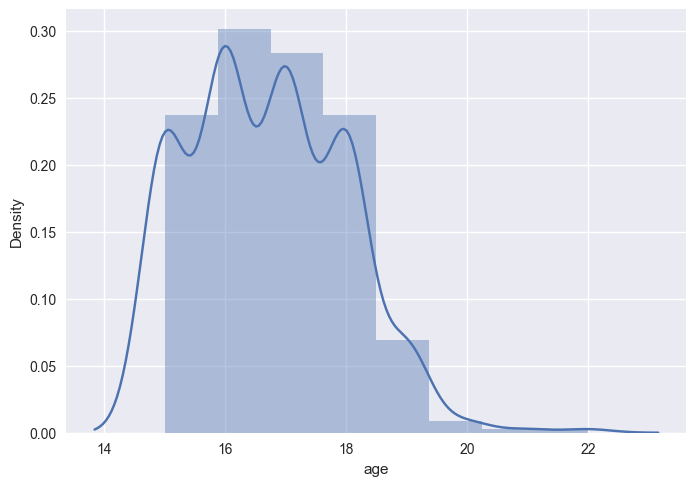

In [19]:
sns.distplot(df["age"], bins=8)

In [20]:
# num_columns = len(df[numerical_columns].columns)
# num_plots_per_row = 3
# num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row

# fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))

# for i, col in enumerate(df[numerical_columns].columns):
#     ax = axes[i // num_plots_per_row, i % num_plots_per_row]
#     sns.distplot(df[numerical_columns][col], ax=ax)
#     ax.set_title(col)

# plt.tight_layout()
# plt.savefig("imgs/distributions.png")
# plt.show()

[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="5"></div>](#IND)
<h2> <font color= #847ACC> Class Balance </h2>
<a id="BAL"></a>

In [21]:
class_count = pd.value_counts(df['approved'], sort = True).sort_index()
class_count

approved
0    264
1    131
Name: count, dtype: int64

In [22]:
%%time
# Class Composition - Pie Plot
fig = go.Figure(data=[go.Pie(labels=['Not approved', 'approved'], 
                                    values=class_count, 
                                    pull=[0.05, 0, 0], 
                                    opacity=0.85)])
fig.update_layout(
    title_text="Class Composition")
fig.show()

CPU times: total: 0 ns
Wall time: 15.8 ms


<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡 Insights:</font></h3>
    
a

- Subsampling
- Oversampling
- Class Weights

[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="5"></div>](#IND)
<h1> <font color= #847ACC> Pre-processing </h1>
<a id="PREP"></a>
<br> 
<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#ECB431'>❗️</font></h3>
    
From this point on, there begin to be conflicts with the data types `pyarrow`, so they will be converted to a more user-friendly format.

___

<h1> <font color= #847ACC> Models </h1>
<a id="MODELOS"></a>

_"All models are wrong, but some are useful"_ \
— George Box


[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="5"></div>](#IND)
<h2> <font color= #847ACC> Logistic Regression </h2>
<a id="RL"></a>

<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#ECB431'>💡 Justification:</font></h3>
    
- Logistic Regression is a relatively simple algorithm; it transforms a linear input into a probability (in the range of 0-1) using the Sigmoid function:

$$S(x) = \frac{1}{1+e^{-X\beta}}$$
 
Where $X$ is the set of predictor features, and $\beta$ is the corresponding weight vector. Computing $S(x)$ yields a probability indicating whether an observation should be classified as `1` or `0`.
<br>

- It is highly interpretable due to its output (probabilities), making it easier to explain to a non-technical audience compared to other models.

- Computationally, it requires less computational power compared to more complex models such as Neural Networks or Decision Trees.
    

In [23]:
# Save as array the features and the classes
X = df[numerical_columns].iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [24]:
# Split data after Oversampling and Undersampling
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.35, random_state = 42)

In [25]:
# Logistic Regression with Subsampling, Oversampling and Class Weights
LR = LogisticRegression(random_state = 0, C=10, penalty= 'l2', class_weight = {0: 1, 1:2})

In [26]:
LR.fit(x_train1, y_train1) #.predict(X).sum()

LogisticRegression(C=10, class_weight={0: 1, 1: 2}, random_state=0)

In [27]:
LR.fit(x_train1, y_train1) #.predict(X).sum()

LogisticRegression(C=10, class_weight={0: 1, 1: 2}, random_state=0)

In [28]:
# Refit is for GS to optimize for that metric.
# Increasing the search space for the weights helps the model focus on fraud cases.

def grids(search_space: np.ndarray, opt_metric: str, cv: int):
    
    grid_ = GridSearchCV(
    estimator = LogisticRegression(max_iter = 500),
    param_grid = {'class_weight': [{0: 1, 1:v} for v in search_space]},
    scoring = {'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'f1': make_scorer(f1_score)},
    refit = opt_metric, 
    return_train_score = True,
    cv = cv,
    n_jobs = -1
    )
    
    return grid_

In [29]:
grid_prec = grids(np.linspace(1, 20, 30), opt_metric = 'precision', cv = 10)

In [30]:
grid_rec = grids(np.linspace(1, 20, 30), opt_metric = 'recall', cv = 10)

In [31]:
grid_f1 = grids(np.linspace(1, 20, 30), opt_metric = 'f1', cv = 10)

In [32]:
%%time
grid_prec.fit(x_train1, y_train1)
grid_prec.best_params_['class_weight']

CPU times: total: 469 ms
Wall time: 5.24 s


{0: 1, 1: 2.9655172413793105}

In [33]:
%%time
# ¡¡¡Notice how a model focused on detecting more frauds (recall) assigns a lot of weight to '1'.!!!
grid_rec.fit(x_train1, y_train1)
grid_rec.best_params_['class_weight']

CPU times: total: 297 ms
Wall time: 2.41 s


{0: 1, 1: 4.275862068965517}

In [34]:
%%time
grid_f1.fit(x_train1, y_train1)
grid_f1.best_params_['class_weight']

CPU times: total: 422 ms
Wall time: 2.56 s


{0: 1, 1: 4.275862068965517}

In [35]:
# These are the results of the GridSearch
# Originally, it uses 'mean_test_score' for optimization, with the default score being Accuracy.
# In a highly imbalanced case, it's not a good choice to use it as a reference metric.
# It will be changed to precision, recall, or f1, as appropriate. They are added to the GridSearch.

df = pd.DataFrame(grid_prec.cv_results_)

In [36]:
df[['param_class_weight', 'params', 
    'mean_test_precision', 'mean_train_precision', 
    'mean_test_recall', 'mean_train_recall',
    'mean_test_f1', 'mean_train_f1']]

# These results are from the first fit, that is, with optimized precision, which is why weights 0:1 and 1:1 are chosen.
# Notice how the precision is decreasing

,param_class_weight,params,mean_test_precision,mean_train_precision,mean_test_recall,mean_train_recall,mean_test_f1,mean_train_f1
0,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",0.988889,1.000000,0.976389,1.0,0.982222,1.000000
1,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",0.988889,1.000000,0.976389,1.0,0.982222,1.000000
2,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",0.988889,0.992174,0.976389,1.0,0.982222,0.996061
3,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",0.990000,0.990875,0.987500,1.0,0.988070,0.995408
4,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",0.977500,0.989559,0.987500,1.0,0.982237,0.994745
5,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",0.978889,0.989559,1.000000,1.0,0.988854,0.994745
6,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",0.978889,0.989559,1.000000,1.0,0.988854,0.994745
7,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",0.978889,0.989559,1.000000,1.0,0.988854,0.994745
8,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",0.978889,0.989559,1.000000,1.0,0.988854,0.994745
9,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",0.978889,0.989559,1.000000,1.0,0.988854,0.994745


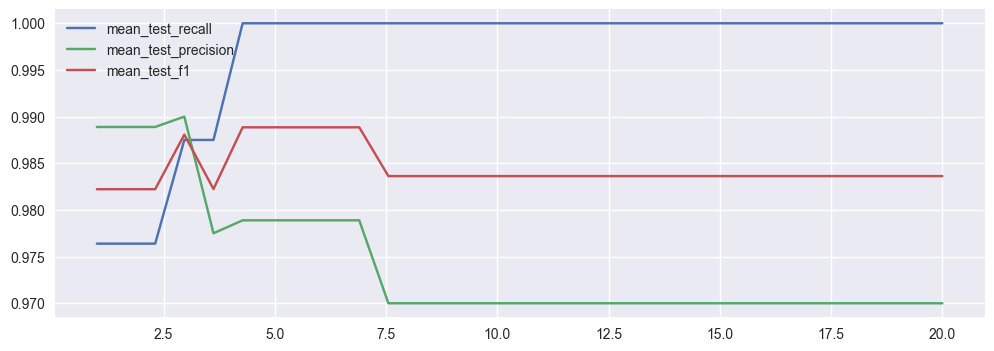

In [37]:
plt.figure(figsize = (12, 4))
for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_f1']:
    plt.plot([_[1] for _ in df['param_class_weight']],
             df[score],
             label = score)
plt.legend();

- The class weights are on the 'x' axis, and the 3 scores are on the 'y' axis.
- If you are looking for balance, the crossing point is the optimal weight (f1_score).
- If you are looking to maximize one, its peak point is the goal.
    - For 'precision', it's with a 1:1 weight ratio.
    - For 'recall', it's a higher weight ratio, between 1:15 and 1:20.
    - For 'f1', it's with a 1:1 weight ratio.

In [38]:
# Unlike .predict, .predict_proba returns the probabilities without the threshold criterion.
probs = grid_f1.predict_proba(x_test1)

In [39]:
# There is an array with the probabilities for class 0 and 1, where these are complementary.
# We will work with the probabilities of class 1.
print(probs.shape)
probs_1 = probs[:, 1]

(139, 2)


In [40]:
fpr, tpr, thresholds = roc_curve(y_test1, probs_1)

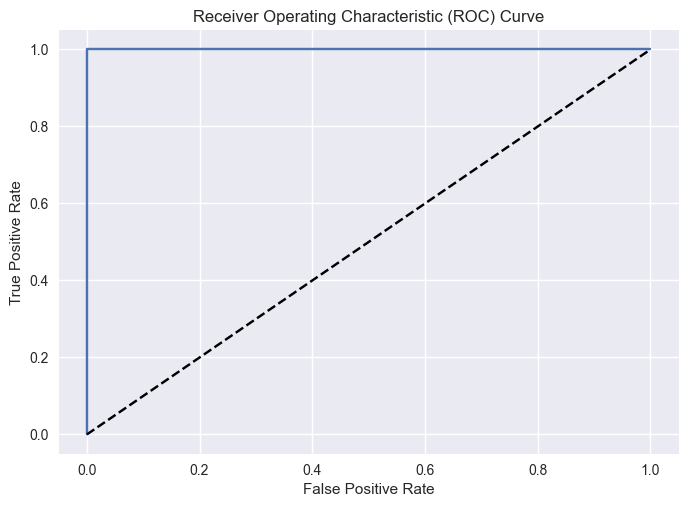

In [41]:
# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [42]:
def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n==========================================================================")
        print("__________________________________________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n==========================================================================")        
        print("__________________________________________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

In [43]:
# Confussion Matrix Function
def CM(y_test, y_pred):
    
    # Confussion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')

<h3> <font color= #847ACC> Case 1- Optimizing Precision </h3>

In [44]:
prec_train_pred = grid_prec.predict(x_train1)
prec_test_pred = grid_prec.predict(x_test1)

In [45]:
print_score(y_train1, prec_train_pred, train=True)
print_score(y_test1, prec_test_pred, train=False)

Train Result:
__________________________________________________________________________
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    1.000000   0.988235  0.996094    0.994118      0.996140
recall       0.994186   1.000000  0.996094    0.997093      0.996094
f1-score     0.997085   0.994083  0.996094    0.995584      0.996100
support    172.000000  84.000000  0.996094  256.000000    256.000000
__________________________________________________________________________
Confusion Matrix: 
 [[171   1]
 [  0  84]]

Test Result:
__________________________________________________________________________
Classification Report:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    92.0  47.0       1.0      139.0         139.0
____________________________

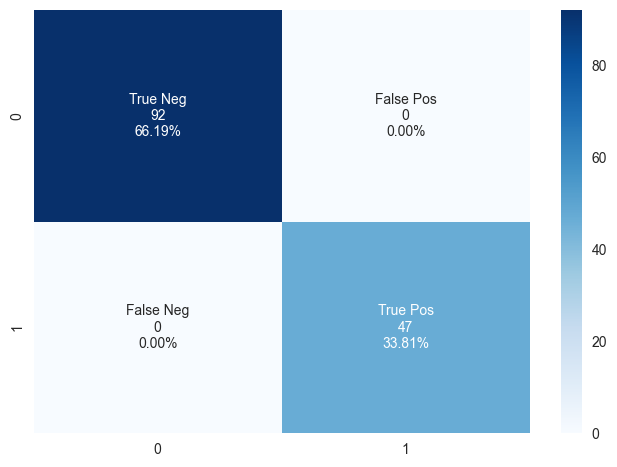

In [46]:
CM(y_test1, prec_test_pred)

In [47]:
end_time = time.time()
total_time = end_time - start_time
print(f"Total runtime: {total_time:.2f} seconds")

Total runtime: 13.82 seconds
